In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


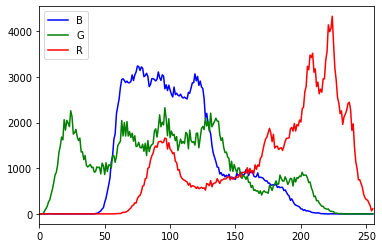

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

pic_file = '/content/drive/MyDrive/DATASET_TASK2_MAI391/LeNa_color.png'

img_bgr = cv2.imread(pic_file, cv2.IMREAD_COLOR) #OpenCVRead color sequence: BRG 
img_b = img_bgr[..., 0]
img_g = img_bgr[..., 1]
img_r = img_bgr[..., 2]
fig = plt.gcf()    



# Calculate the color histogram according to the three channels R, G and B
b_hist = cv2.calcHist([img_bgr], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([img_bgr], [1], None, [256], [0, 256])
r_hist = cv2.calcHist([img_bgr], [2], None, [256], [0, 256])

# Display the color histogram of 3 channels
plt.plot(b_hist, label='B', color='blue')
plt.plot(g_hist, label='G', color='green')
plt.plot(r_hist, label='R', color='red')
plt.legend(loc='best')
plt.xlim([0, 256])
plt.show()



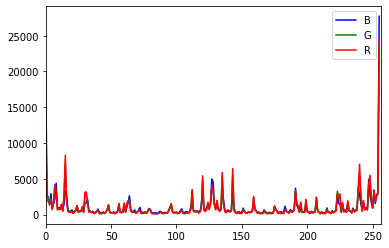

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value


def lbp_calculated_pixel(img, x, y):
    '''
     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    
    '''    
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y))       # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val 

pic_file = '/content/drive/MyDrive/DATASET_TASK2_MAI391/LeNa_color.png'

img_bgr = cv2.imread(pic_file, cv2.IMREAD_COLOR) #OpenCVRead color sequence: BRG 
height, width, channel = img_bgr.shape
img_b = img_bgr[..., 0]
img_g = img_bgr[..., 1]
img_r = img_bgr[..., 2]
fig = plt.gcf() 

img_lbp_1 = np.zeros((height, width,3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
          img_lbp_1[i, j] = lbp_calculated_pixel(img_b, i, j)

img_lbp_2 = np.zeros((height, width,3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
          img_lbp_2[i, j] = lbp_calculated_pixel(img_g, i, j)

img_lbp_3 = np.zeros((height, width,3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
          img_lbp_3[i, j] = lbp_calculated_pixel(img_r, i, j)




# Calculate the color histogram according to the three channels R, G and B
b_hist = cv2.calcHist([img_lbp_1], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([img_lbp_2], [0], None, [256], [0, 256])
r_hist = cv2.calcHist([img_lbp_3], [0], None, [256], [0, 256])

# Display the color histogram of 3 channels
plt.plot(b_hist, label='B', color='blue')
plt.plot(g_hist, label='G', color='green')
plt.plot(r_hist, label='R', color='red')
plt.legend(loc='best')
plt.xlim([0, 256])
plt.show()